In [2]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import math

In [3]:
mario = plt.imread('mario.png')

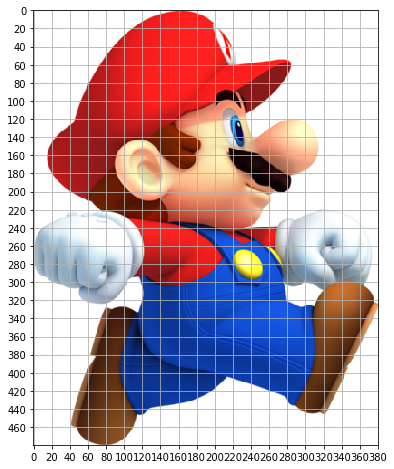

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(mario)
plt.xticks(range(0,400,20))
plt.yticks(range(0,480,20))
plt.grid(True, 'both')

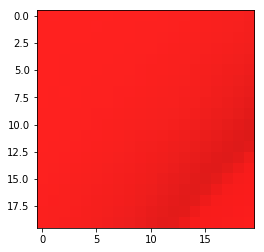

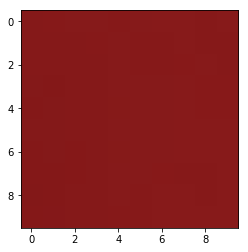

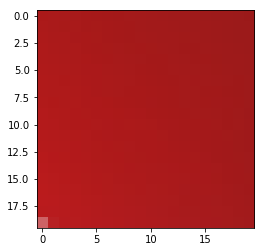

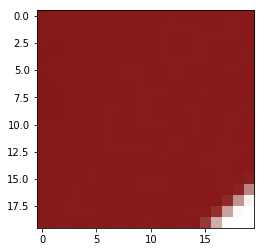

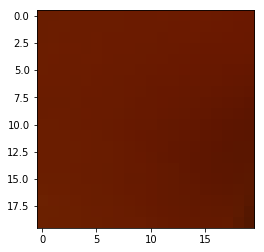

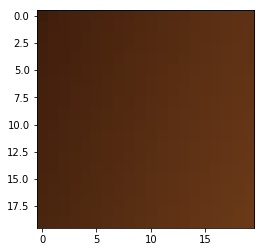

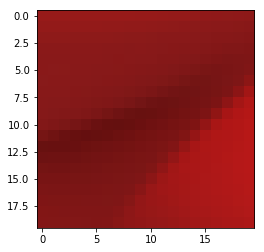

In [5]:
new_mario = mario
# new_mario = mpl.colors.rgb_to_hsv(mario[:,:,:3])
hat =      new_mario[60:80,180:200]
dark_hat = new_mario[80:90, 240:250]
extra_hat = new_mario[180:200,40:60]
front_hat= new_mario[80:100,240:260]
hair =     new_mario[200:220, 80:100]
shoe =     new_mario[420:440, 60:80]
armpit =   new_mario[280:300, 140:160]

right_arm = new_mario[240:260, 40:60]
left_arm =  new_mario[260:280,340:360]
dress =     new_mario[340:360, 220:240]
cheek =     new_mario[180:200,180:200 ]
yellow_button = new_mario[260:280,220:240]
white_bg = new_mario[440:460, 0:20]
sall = [hat,dark_hat,extra_hat,front_hat,hair,shoe,armpit]
for i in sall:
    plt.figure()
    plt.imshow(i)

In [6]:
# define signal(red cloth/hat) and background(other stuff)
# signal and background is now just an array of shape (npixel, 3)
# this will make you life simpler when you analyze stuff
# print the shape to see what it looks like
def flat(p):
    return p.reshape(-1, p.shape[-1])

signal = np.concatenate((
    flat(hat),
    flat(dark_hat),
    flat(front_hat),
    flat(armpit),
    flat(right_arm),
    flat(left_arm),
    flat(extra_hat)
))[:, :3] # remove the alpha channel

background = np.concatenate((
    flat(hair),
    flat(shoe),
    flat(dress),
    flat(cheek),
    flat(white_bg),
    flat(yellow_button)
))[:, :3] # remove the alpha channel

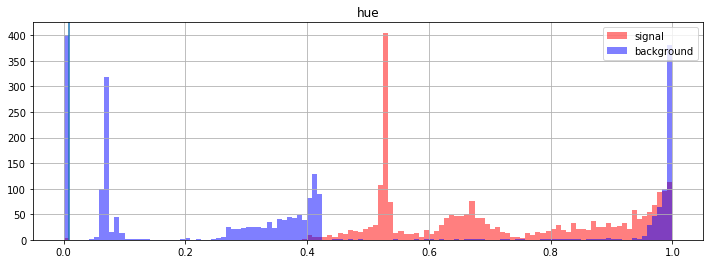

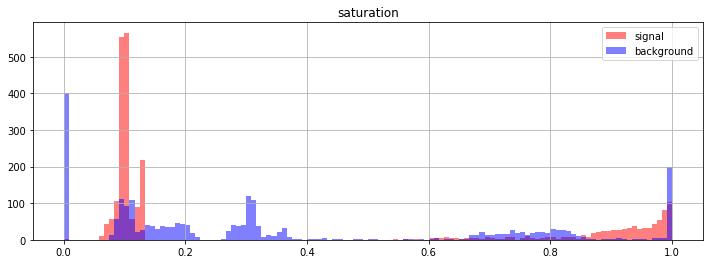

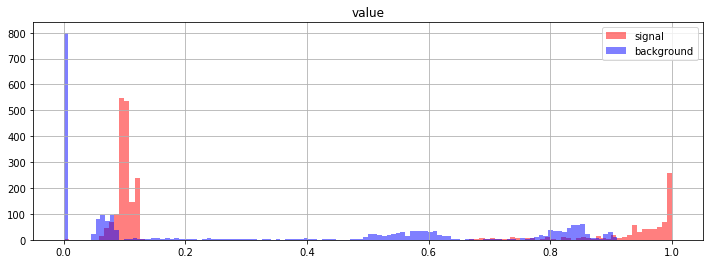

In [7]:
# fig = plt.figure(figsize=(12,4))

nbin = int(360/3)

# fig.add_subplot(131)
fig = plt.figure(figsize=(12,4))
plt.grid()
plt.title("hue")
plt.hist(signal[:,0],alpha=0.5,color='r',label='signal', bins=nbin )
plt.hist(background[:,0],alpha=0.5,color='b',label='background',bins=nbin)
##width of each bins
plt.axvline(0.008)
plt.legend()

# fig.add_subplot(132)
fig = plt.figure(figsize=(12,4))
plt.grid()
plt.title('saturation')
plt.hist(signal[:,1],alpha=0.5,color='r',label='signal',bins=nbin)
plt.hist(background[:,1],alpha=0.5,color='b',label='background',bins=nbin)
plt.legend()

# fig.add_subplot(133)
fig = plt.figure(figsize=(12,4))
plt.grid()
plt.title('value')
plt.hist(signal[:,2],alpha=0.5,color='r',label='signal',bins=nbin)
plt.hist(background[:,2],alpha=0.5,color='b',label='background',bins=nbin)

plt.legend()

# fig.tight_layout()
# plt.show()

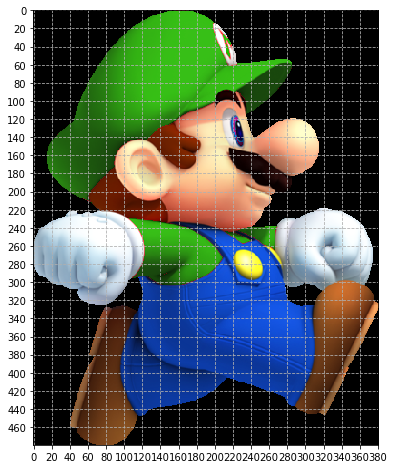

In [10]:
plt.figure(figsize=(8,8))
plt.xticks(range(0,400,20))
plt.yticks(range(0,480,20))
plt.grid(True, 'both',ls='--')
def red_mask(pic):
    def flat(p):
        return p.reshape(-1, p.shape[-1])
    ny = pic.shape[0]
    nx = pic.shape[1]
    mask = np.zeros(pic.shape)[:,:,:3]
    tmp = np.zeros(pic.shape)[:,:,:3]
    flat(mask)
    #Change to HSV color space (rgb_to_hsb return array)
    mask = mpl.colors.rgb_to_hsv(pic[:,:,:3])
    # EDIT FOR LOOP TO MATCH HSV VALUE
    for i in range(1,ny):
        for j in range(1,nx):
            h = mask[i,j][0]
            s = mask[i,j][1]
            v = mask[i,j][2]
#             if(h < 0.3 and s > 0.8 and v > 0.55):
            if( (0<=h<=0.01 or 0.5 <= h <= 0.58 or 0.9<=h<=1) and (0.8<=s<=1) and (0.4<=v<=1) ):
#                 tmp[i,j] = np.array([0,1,1]) #white
                mask[i,j][0] += 0.3
                mask[i,j][0] = mask[i,j][0]%1
                mask[i,j][2] -= 0.25
#             else:
#                 tmp[i,j] = np.array([0,0,0])
#     mask = tmp
    return mask

masked = red_mask(mario);
plt.imshow(mpl.colors.hsv_to_rgb(masked))

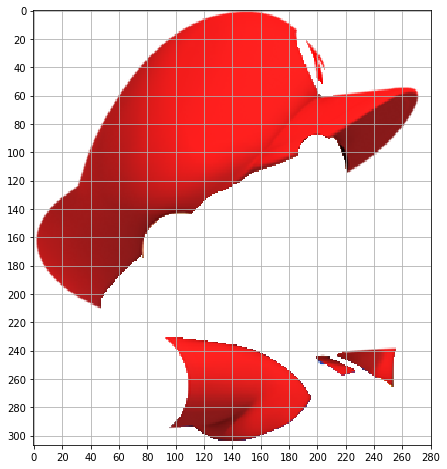

In [9]:
sampling = plt.imread('sampling.png')
plt.figure(figsize=(8,8))
plt.imshow(sampling)
plt.xticks(range(0,300,20))
plt.yticks(range(0,320,20))
plt.grid(True, 'both')